In [ ]:
!pip install imutils --user

In [ ]:
import imutils
import cv2
import numpy as np
from matplotlib import pyplot as plt

Read the image

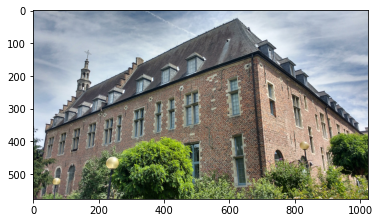

In [ ]:
image = cv2.imread("Church.jpg")
plt.imshow(image[:,:,::-1])

In [ ]:
print("All the three channels",image)

All the three channels [[[187 167 156]
  [185 165 154]
  [185 165 154]
  ...
  [207 194 186]
  [205 192 184]
  [204 191 183]]

 [[186 166 155]
  [187 167 156]
  [187 167 156]
  ...
  [207 194 186]
  [206 193 185]
  [207 194 186]]

 [[182 162 151]
  [185 165 154]
  [185 167 156]
  ...
  [208 195 187]
  [208 195 187]
  [209 196 188]]

 ...

 [[135 159 159]
  [107 123 129]
  [ 66  69  83]
  ...
  [  5  79  67]
  [ 19  83  71]
  [ 62 142 129]]

 [[120 154 144]
  [145 167 165]
  [ 81  89  96]
  ...
  [ 43 104 100]
  [  0  66  59]
  [ 16  94  83]]

 [[ 80 116 102]
  [105 131 125]
  [ 83  92  96]
  ...
  [ 75 131 132]
  [ 30 100  94]
  [ 40 115 107]]]


In [ ]:
print("Pixel values in channel 1(Red)={}".format(image[:,:,0]))

Pixel values in channel 1(Red)=[[187 185 185 ... 207 205 204]
 [186 187 187 ... 207 206 207]
 [182 185 185 ... 208 208 209]
 ...
 [135 107  66 ...   5  19  62]
 [120 145  81 ...  43   0  16]
 [ 80 105  83 ...  75  30  40]]


In [ ]:
print(image.shape)

(576, 1024, 3)


In [ ]:
px = image[100,100]
#Intensity of pixel at [100.100] - meaning all the channels
print("Intensity={}".format(px))

red = image[100,100,0]
green = image[100,100,1]
blue = image[100,100,2]
print("Red={}, Green={}, Blue={}".format(red,green,blue))

Intensity=[203 189 177]
Red=203, Green=189, Blue=177


In [ ]:
#Changing the pixel intensity value at (10,10)
print("Initial pixel intensity at (10, 10, 1)={}".format(image[10,10,2]))
image.itemset((10,10,2),100)
print("Modified pixel intensity at (10, 10, 1)={}".format(image[10,10,2]))

Initial pixel intensity at (10, 10, 1)=160
Modified pixel intensity at (10, 10, 1)=100


In [ ]:
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
print("Total number of pixels in image:", image.size)
print ("Image intensity data type:",image.dtype)

width=1024, height=576, depth=3
Total number of pixels in image: 1769472
Image intensity data type: uint8


In [ ]:
#Splitting the image channels into b,g and r
b,g,r = cv2.split(image)
print(b)

[[187 185 185 ... 207 205 204]
 [186 187 187 ... 207 206 207]
 [182 185 185 ... 208 208 209]
 ...
 [135 107  66 ...   5  19  62]
 [120 145  81 ...  43   0  16]
 [ 80 105  83 ...  75  30  40]]


In [ ]:
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

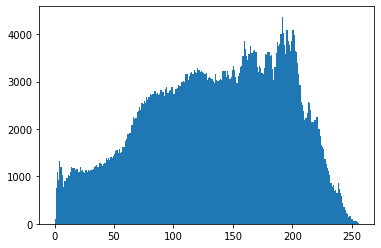

In [ ]:
#Histogram generation
hist = cv2.calcHist([image1],[0],None,[256],[0,256])
plt.hist(image1.ravel(),256,[0,256]); plt.show()

In [ ]:
#from google.colab.patches import cv2_imshow

In [ ]:
#cv2_imshow(image)

Part 2 - Use a new notebook -

Histogram of Gradients

In [ ]:
import numpy as np
import json
import cv2
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from skimage import data, exposure

In [ ]:
from google.colab.patches import cv2_imshow

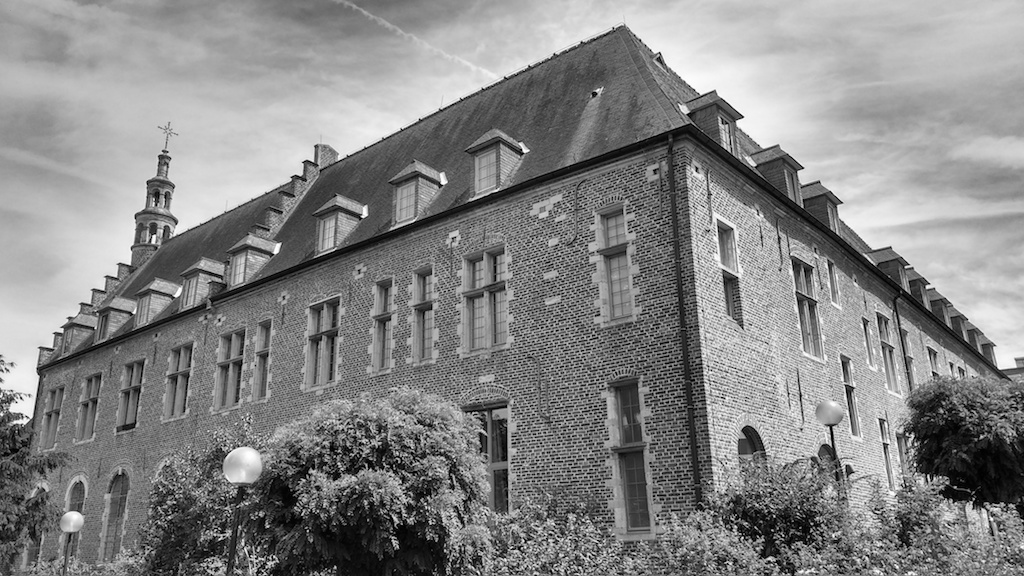

In [ ]:
#Convert from RGB to gray image
data_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(data_gray)

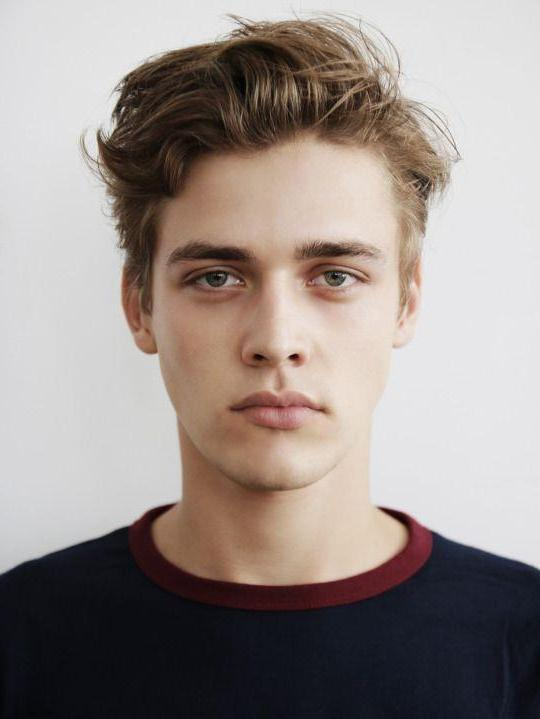

In [ ]:
personimage = cv2.imread("personimage.jpg")
cv2_imshow(personimage)

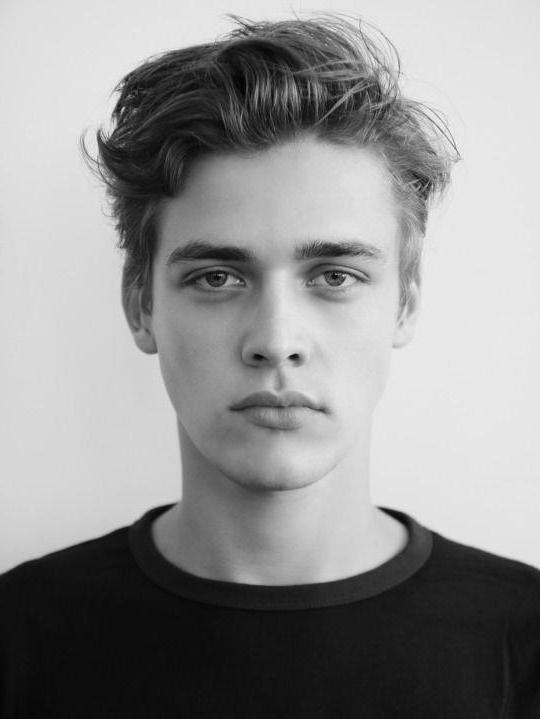

In [ ]:
data_gray = cv2.cvtColor(personimage, cv2.COLOR_BGR2GRAY)
cv2_imshow(data_gray)

In [ ]:
ppc = 16

fd,hog_image = hog(data_gray, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)

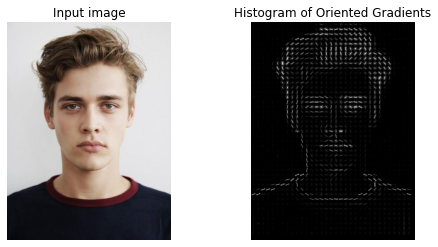

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(personimage[:,:,::-1], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()
#plt.imshow(hog_image)